0.085323386


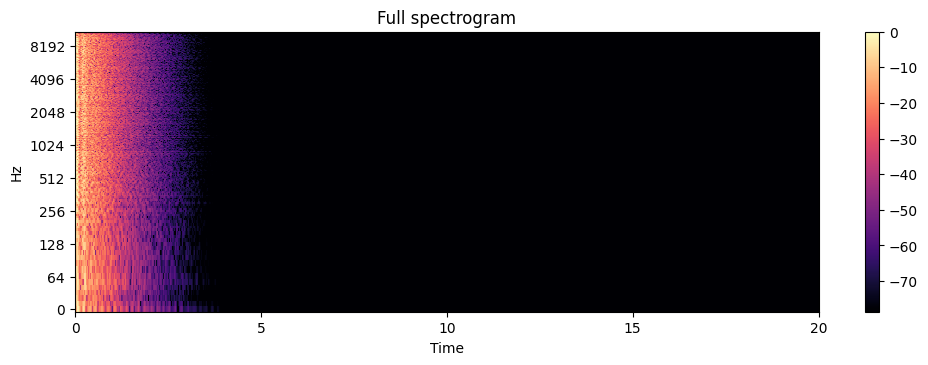

In [1]:
sample_file = "../data/combinedWav/CAVE.WAV"
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

y, sr = librosa.load(sample_file)

# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))

print(np.max(S_full))
#plotting the spectrogram
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), y_axis='log', x_axis='time')
plt.title('Full spectrogram')
plt.colorbar()




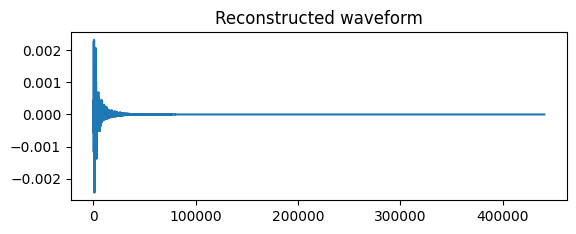

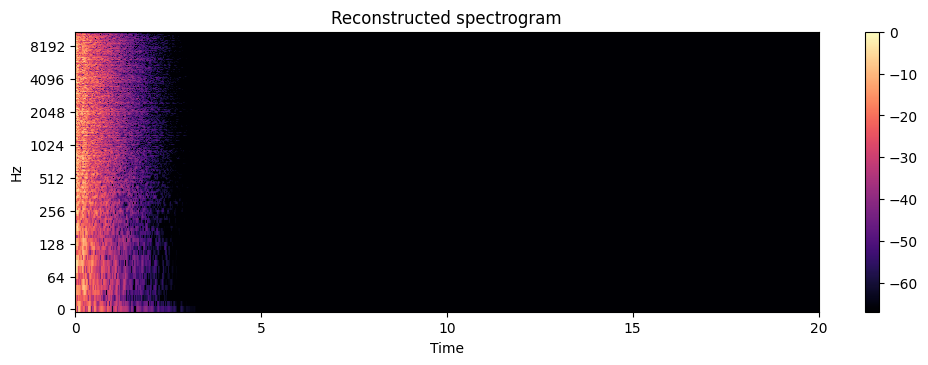

In [6]:
# use griffin lim to reconstruct the waveform
y_hat = librosa.istft(S_full)

#output the reconstructed waveform

# librosa.output.write_wav('reconstructed.wav', y_hat, sr)
sf.write('reconstructed.wav', y_hat, sr)

#create a plot of the reconstructed waveform

plt.subplot(2, 1, 2)
plt.plot(y_hat)
plt.title('Reconstructed waveform')
plt.show()

# take a spectrogram o fthe reconstructed waveform
S_recon = librosa.stft(y_hat)
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(S_recon), ref=np.max), y_axis='log', x_axis='time')
plt.title('Reconstructed spectrogram')
plt.colorbar()
plt.show()
